# Image Compression Using KMeans Clustering
The goal of this project is sto reduce the size of the imagesand reduce sorage space.

# KMeans Clustering Algorithm
KMeans Algorithm is one of **Unsupervised Learning Algorithm** . It is algorithm for clustering where data points that are in the same group exhibit similar features. It consist of k clusters where the algorithm tries to fit the data point in exactly one cluster.These are the following steps that are being performed in this algorithm:
- Specify the number of clusters k.
- Initialize centroid by randaomly selecting k data points.
- Keep iterating util there is n change in the centroid i.e. assignment of data pointsto the clusters.
- Compute sum of the squared distance (Euclidean Distance) between data points and the distance
- Assign each data point to the clusterwhere the distance is minimum.
- Compute the centroid for the clusters by taking the average of all the data points that belong to a cluster.<br>
Hence, KMeans tries to simultaneously<br>1. Minimize the distance between points in a cluster.<br>2. Maximize the distance between clusters.<br> Sometimes the KMeans get stuck in local minima and cannot converge to the global minima for that we can try initializing the K value for number of times and choose the value with lowest sum of square error.<br>**Choosing the value of k:<br>Elbow Method:** It plots the number of clusters vs Sum of square error(SSE), where SSE=$\sum_(i=0)^ndist(x_i-c_i)^2+\sum_(i=1)^ndist(x_i-c_i)^2 --$, and picking the elbow of the curve as the number of clusters(k) to use.
As the cluster size increases the SSE becomes zero.

### Compression
In a coloured image, each pixel is of size 3 bytes (RGB), where each colour can have intensity values from 0 to 255. Their are total combinaitons of 256*256*256. Our eyes can visualize atmost 8-10 colors of a image, therefore rest pixels are just a waste. K-means clustering will group similar colors together into ‘k’ clusters (k=64) of different colors (RGB values). Therefore, each cluster centroid is the representative of the color vector in RGB color space of its respective cluster. Now, these ‘k’ cluster centroids will replace all the color vectors in their respective clusters. Thus, we need to only store the label for each pixel which tells the cluster to which this pixel belongs. Additionally, we keep the record of color vectors of each cluster center.

In [66]:
#Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from skimage import io
from sklearn.cluster import KMeans

### Loading the image

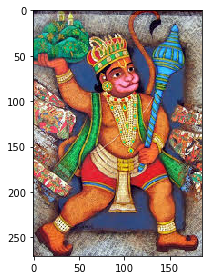

In [67]:
img=io.imread("downloadImage.jpg")
io.imshow(img)
io.show()

In [68]:
img.shape

(271, 186, 3)

The image is 3-dimension of size 271*186. <br>Making the first dimension as row and second as column

In [69]:
rows=img.shape[0]
columns=img.shape[1]
print("rows:{} column:{}".format(rows,columns))

rows:271 column:186


We need to reshape the image because KMeans works on 2-Dimensional array. <br> Using reshapeto conert 3D to 2D where -1 signify 271*186.

In [70]:
#reshaping the image
img=img.reshape(-1,3)
print (img.shape)

(50406, 3)


Performing the KMeans Clustering Algorithm

In [71]:
km=KMeans(n_clusters=128,max_iter=100)
km.fit(img)

KMeans(max_iter=100, n_clusters=128)

We have passed n_clusters=128, this means all the colour combinations in the original image have been quantized to 128 distinct colours only. 

In [72]:
#Printing the total 128 clusters
print(km.cluster_centers_)

[[168.84158416 153.9009901  136.45049505]
 [ 46.30163043  57.93478261  95.2201087 ]
 [212.94109589 107.46849315  46.53835616]
 [ 35.90686275 138.83333333 111.25      ]
 [184.59709619  81.79310345  50.88747731]
 [249.72727273 159.39393939 197.56818182]
 [ 89.07943925  21.97663551  13.47196262]
 [138.26791621 120.10694598 105.16648291]
 [ 44.83743842 163.15763547 241.56157635]
 [186.42340426 176.17659574 160.7212766 ]
 [211.26666667 169.26666667 101.74202899]
 [100.32480818  78.13299233  70.87340153]
 [ 25.86090226 104.94736842  51.46240602]
 [230.81412639 209.71747212 182.5204461 ]
 [151.15873016 166.98941799  53.46560847]
 [ 54.78991597  71.81383323 118.84744667]
 [230.66883117 134.32467532  62.68367347]
 [195.95296524 200.63803681 201.93456033]
 [ 23.63043478  15.69927536  39.11231884]
 [ 66.47003525  44.64629847  51.79553467]
 [226.51097179  34.69592476  46.26332288]
 [129.79054054  52.90540541  21.33783784]
 [153.89230769 156.21958042 158.09090909]
 [244.83268482 244.43968872 233.42

In [73]:
clusters=np.asarray(km.cluster_centers_,dtype='uint8')
labels=np.asarray(km.labels_,dtype='uint8')
labels=labels.reshape(rows,columns)

In [74]:
np.save('codebook_img.npy',clusters)
io.imsave("compressed_img.jpg",labels)

'Codebook_img' is  given to the list of cluster centers which is achieved after running k-means algorithm. 

![alt text](compressed_img.jpg "Title")

This is the compressed image which we get after performing the KMeans algorithm of size 21KB